In [11]:
%%html
Ref:<a href='https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb'>https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb</a>

In [5]:
%%HTML
<h2>Basic understanding of decision trees</h2>
It is one of the most powerful ML algorithms used for classification and regression tasks. A tree model is a set of
"if-then-else" rules that are easy to understand and implement.
<br/>
<b>One of the main qualities of the decision tree is that it requires very little data preparation. In fact they don't require feature scaling or centering</b>
<br/>
Let's go through an example

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
X = iris.data[['petal length (cm)','petal width (cm)']]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )


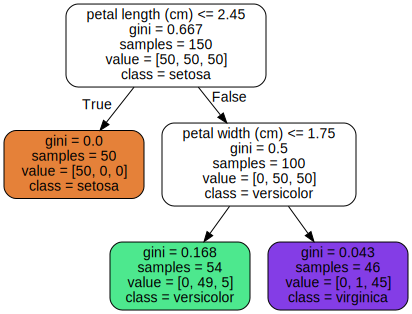

In [4]:
from graphviz import Source

Source.from_file("iris_tree.dot")  # path differs in the book

In [15]:
%%HTML
1) We start with the root node where depth=0: This node asks whether the petal length is smaller than 2.45 cm, 
<br/>    
&ensp;a) If it is yes, it will move down the left child node. 
In this case, it is a leaf node, so it does not ask any further questions and looks at the predicted class for that node. 
Here, it is predicted as Iris Setosa.
<br/>
2) In this case, if the petal length is greater than 2.45cm, then it will move down to its right child node(depth 1, right). 
<br/>
&ensp;a) But in the right child node,it is not a leaf node, but it is a split node where we ask petal width to be smaller than 1.75 cm. 
<br/>
&ensp;b) If it is true it will move to the left child node(depth 2),
which is the leaf node. In that node, it is predicted as Iris Versicolor. 
<br/>
&ensp;c) If the petal width is greater than 1.75 cm, it will move the right child node(depth 2) where it's a leaf node and predicted as Iris Virginica.
<br/>


In [22]:
%%HTML

<b>Decision tree uses a concept called purity/impurity to define which feature is important to split first from the rest of the features. It is measured by 
information gain is the measurement is based on entropy.</b> 
<br/>
Information gain is calculated by comparing the entropy of the dataset before and after a transformation. The higher the gain lower the entropy.
<br/>
<h4>Pseudo code for decision tree classification learning</h4>
1. Start with root node 
<br/>
2. Calculate the information gain for all possible features and pick the one with the highest information gain. The higher the information gain lower the impurity.
<br/>
3. Split the dataset according to selected features  and create left & right branches of the tree 
<br/>  
4. Keep repeating the splitting process until the stopping criteria are met.

<h4>When to stop splitting</h4>
1. When a tree exceeds the maximum depth.
    <br/>  
2. when a purity score is below a threshold.
    <br/>  
3. When the number of examples in a node is below the threshold.

In [24]:
%%html
<h3>Regression using Decision Trees</h3>

In [26]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)


DecisionTreeRegressor(max_depth=2, random_state=42)

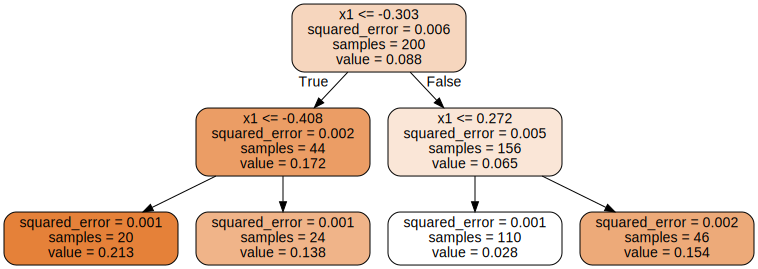

In [27]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

In [37]:
%%HTML

It is similar to classification and the main difference is instead of predicting a class in each node, it predicts a value.
<br/>
Suppose we want to predict for a new instance x1=0.2. The root node asks whether x1<=0.197 since its note algorithm goes to the right child, which asks whether x1<0.772.
Since it is, the algorithm goes to the left child node. This is a leaf node and predicts the value=0.111. The prediction is the average of 110 training instances associated
with this leaf node.
<br/>
<br/>
<b>Another main difference is calculating the purity/impurity. In regression, they use squared deviation from the mean(squared error)</b>
<br/>
<h4>Important points</h4>      
1. Decision trees tend to overfit and restricting the decision tree's freedom in terms hyper hyperparameters can help avoid overfitting.
<br/>
2. Generally decision trees have high variance and small changes to hyperparameters or the data may produce different models. Averaging prediction over 
many trees, it's possible to reduce the variance significantly. We learn about such an ensemble of trees in the coming section.
<img src="images/dt1.jpg" width=400 />

In [9]:
%%HTML
<h2>Ensemble Learning and Random Forests</h2>
Ref:<a href="https://github.com/ageron/handson-ml3/blob/main/07_ensemble_learning_and_random_forests.ipynb">https://github.com/ageron/handson-ml3/blob/main/07_ensemble_learning_and_random_forests.ipynb</a>
<br/>

If we aggregate the predictions of a group of predictors (classifiers or regressors), you will often get better predictions than the best
individual predictors. A group of predictors is called ensembles; thus, this technique is called ensemble learning.

In [8]:
%%HTML
<h2>Voting classifier</h2>
Suppose we have trained a few classifiers, each achieving 80% accuracy. You may have a logistic regression classifier, an SVM classifier, a random forest classifier, a KNN classifier etc.
<img src="images/dt2.png" width=400 />
A straightforward way to create an even better classifier is to aggregate the predictions of each classifier: The class that gets the most votes is the
    ensemble's prediction. this majority-vote classifier is called a hard-voting classifier.
<img src="images/dt3.png" width=400 />
<b>The ensemble methods work best when the predictors are as independent as possible. One way to get diverse classifiers is to train them using very different algorithms.</b>


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

array([[ 1.53869929e+00,  1.88744130e-01],
       [ 3.94698536e-01,  3.23723608e-01],
       [-9.19146564e-01,  1.31188165e+00],
       [ 1.05396355e+00, -7.00407873e-01],
       [ 1.04067847e+00, -4.37338701e-01],
       [ 1.00933981e-01, -3.03530559e-01],
       [ 1.18128413e+00,  7.61136745e-02],
       [-1.21046915e-01, -9.08388899e-02],
       [-8.87106610e-01,  5.12633178e-01],
       [ 9.37451497e-01,  2.34296809e-01],
       [ 7.11654204e-01,  1.54701440e-01],
       [ 1.25893422e+00, -3.54797752e-01],
       [ 3.86380017e-01,  4.15946340e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [-7.40742091e-01,  5.36229504e-01],
       [ 2.05623856e+00, -2.39382466e-02],
       [ 1.85814503e+00,  3.09624394e-01],
       [-5.61395675e-01,  6.35114044e-01],
       [ 1.19704521e+00,  1.05274369e-01],
       [-8.14968012e-01,  2.64231623e-01],
       [ 2.15881305e+00,  1.49840044e-01],
       [ 1.11201360e+00, -2.15523587e-01],
       [ 1.30882068e+00,  7.26225254e-01],
       [-7.

In [14]:
voting_clf = VotingClassifier([
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
])
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [15]:
# Let's look at each classifier's accuracy
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))
    

lr = 0.864
rf = 0.896
svc = 0.896


In [16]:
voting_clf.predict(X_test[:1])

array([1])

In [17]:
voting_clf.score(X_test, y_test)

0.912

In [19]:
# ^^Here we go we have voting classifer that is an ensmble outperforms the individial classifier's accuracy.

In [20]:
%%HTML
If all classifiers can estimate the class probabilities(i.e. if they have the predict_proba method), then we can say the algorithm can predict the class with the highest probability, 
averaged over all individual classifiers. This often achieves higher performance than hard voting because it gives more weight to highly confident votes.
This is called soft voting.

In [22]:
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability = True #  SVC wont estimate the probability br default, so we need to set the probability hyperparameter set to true.
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [26]:
%%HTML
<h2>Bagging and Pasting</h2>
One approach in ensembling is to use a diverse set of classifiers. 
Another approach is to use the same training algorithm with a different random subset of training data.
When sampling is done with replacement or bootstrapping the data, this method is called <b>bagging</b>.
<img src="images/dt4.png" width=400 />
When sampling is done without replacement is called <b>pasting</b>. Random forest is an example of a bagging technique.

In [18]:
# We can use a bagging classifier for pasting, by setting bootstrap=False.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)# bootstrap=False
bag_clf.fit(X_train, y_train)
# A bagging classifier automatically performs soft voting instead of hard voting by default 
# If the base classifier can estimate the class probabilities (i.e. it has predict_proba() method)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [30]:
%%HTML
<h4>Pseudocode of bagging</h4>

1) Given a training set of size m
<br/>
2) Repeat unit b=B where B is the number of decision trees 
    <br/>
&nbsp a) Create a new training dataset with size of m by sampling with replacement(bootstrapping)
<br/>
&nbsp b) Train Decision tree on the new training dataset
<br/>
3) Do the prediction based on a soft vote or hard vote on results from tree ensembles.


In [13]:
%%HTML
<h3>Random Forests</h3>
A random forest is an ensemble of decision trees, generally trained via bagging. Compared to the bagging approach, the random forest resamples the data, as in bagging at the same time, it samples the random subset of features when splitting the trees.
<br/>
<b>Random forest is good at finding the feature importance.</b>

In [6]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_f = rnd_clf.predict(X_test)
y_pred_f

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [7]:
y_pred_f = rnd_clf.predict_proba(X_test)
y_pred_f

array([[0.53695096, 0.46304904],
       [0.76195437, 0.23804563],
       [0.69885321, 0.30114679],
       [0.02593744, 0.97406256],
       [0.05214392, 0.94785608],
       [0.13123152, 0.86876848],
       [0.97342304, 0.02657696],
       [0.96131288, 0.03868712],
       [0.89327411, 0.10672589],
       [0.9633869 , 0.0366131 ],
       [0.0167455 , 0.9832545 ],
       [0.9729177 , 0.0270823 ],
       [0.08095207, 0.91904793],
       [0.14947684, 0.85052316],
       [0.02654905, 0.97345095],
       [0.95786891, 0.04213109],
       [0.95736899, 0.04263101],
       [0.04939872, 0.95060128],
       [0.10221897, 0.89778103],
       [0.9382936 , 0.0617064 ],
       [0.96503041, 0.03496959],
       [0.13536559, 0.86463441],
       [0.51046927, 0.48953073],
       [0.9432729 , 0.0567271 ],
       [0.90911755, 0.09088245],
       [0.81224262, 0.18775738],
       [0.07940346, 0.92059654],
       [0.96935941, 0.03064059],
       [0.04942553, 0.95057447],
       [0.94784519, 0.05215481],
       [0.

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


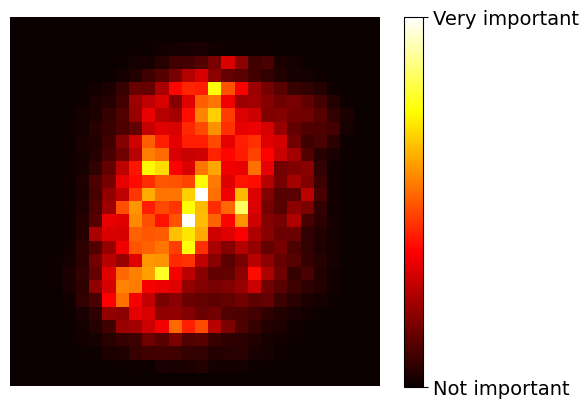

In [9]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

# extra code – this cell generates and saves Figure 7–6
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False,
                                parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

In [12]:
%%HTML

<h4>Pseudocode of Random Forest</h4>
1) Get the subsample from the original training dataset.
<br/>
2) For the first split, take the sample of features/predictor variables where f<F(total number of features).
    <br/>
3) Proceed with the next split by repeating step 2 for other nodes until the tress is grown.
<br/>
4) Repeat steps 1 to 3 by taking another subsample of data and following the other steps until we create the maximum number 
of trees in the ensemble.
<br/>
5) Do the prediction based on a soft or hard vote on results from tree ensembles.

In [15]:
%%HTML
<h2>Boosting</h2>
Boosting refers to any ensemble method that can combine several weak learners into a strong learner. The general idea of boosting
methods is to train predictors sequentially, each trying to correct its predecessor.

In [17]:
%%HTML
<h3>AdaBoost</h3>
When training an AdaBoost classifier, the algorithm first trains a base classifier(such as a decision tree) and uses it to predict the training set.
The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights of the trainig instances
and again make predictions on the training set, update the instance weight & so on.

<img src="images/ada_boost.jpg" width=400 />

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30, learning_rate=0.5, random_state=42)
ad_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [22]:
%%HTML
<h3>Gradient Boosting</h3>
Just like AdaBoost, gradient boosting works by sequentially adding predictors/algorithms to an ensemble, each one correcting its predecessor.
However, instead of tweaking the instance weights at every iteration as AdaBoost does, this method tries to fit the new predators with residual error 
made by the previous predictor.

In [29]:
# Consider this example and let's fit the base learner.

import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [30]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [34]:
# Finding the residual error
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)
# And Then we train a third regressor on the residual error made by the second predictor
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [36]:
# Final prediction:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [40]:
%%HTML
We can explain that in a diagram(ref: https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/)
<img src="images/gb.png" width=600 />
<h4>Why we are taking the residual error as a target</h4>
Because we want to minimize these residuals minimizing the residuals will eventually improve our model accuracy and prediction power. 
So, using the Residual as a target, we will generate new predictions. 
Note that the predictions, in this case, will be the error values, not the predicted car price values since our target column is an error now.
<h4>How do we make predictions on the error values?</h4>
To find the output we can simply take the average of all the numbers in a leaf, doesn’t matter if there is only 1 number or more than 1.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [42]:
gbrt.n_estimators_

3

In [45]:
# We could use cross-validation to find out the optimal number of trees, but there is a better method here 
# by adding a parameter called n_iter_no_change. This parameter simply stops adding more trees if the tree is not improving for the last n trees.
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)
gbrt_best.n_estimators_ # in this example, we added maximum tree to 500, but it did early stopping at 92.

92

In [1]:
%%HTML
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework. 
XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 
The same code runs on major distributed environments (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

<br/>
<br/>
Boosting is prone to overfitting and the hyperparameters must be tuned to avoid this. Regularization is one way to prevent overfitting.
Cross-validation is especially important for boosting trees due to the many hyperparameters that need to be set.

In [5]:
%%HTML
<h2>Stacking</h2>
It is based on the simple idea that instead of using trivial functions (such as hard voting) to aggregate the prediction of all predictors in 
an ensemble, why don't we train a model to perform this aggregation?
<img src="images/stacking1.jpg" width=400 />
As shown in the above diagram, an ensemble performs a regression task on a new instance. Each of the bottom three predictors predicts a different value,
and then the final predictor called a blender or a meta-learner takes these predictions as input and makes the final prediction.
<img src="images/stacking2.jpg" width=400 />
To train the blender or meta learner, we first need to build the blending training set. We can use cross_val_predict() on every predictor/algorithm
in the ensemble to get predictions for each instance in the original training set and these can be used as input features to train the blender;
and the target can be copied from the original training set.
<img src="images/stacking3.jpg" width=400 />    
As shown in the above image, we can train several different blenders in this way.

In [6]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train


array([[ 1.53869929e+00,  1.88744130e-01],
       [ 3.94698536e-01,  3.23723608e-01],
       [-9.19146564e-01,  1.31188165e+00],
       [ 1.05396355e+00, -7.00407873e-01],
       [ 1.04067847e+00, -4.37338701e-01],
       [ 1.00933981e-01, -3.03530559e-01],
       [ 1.18128413e+00,  7.61136745e-02],
       [-1.21046915e-01, -9.08388899e-02],
       [-8.87106610e-01,  5.12633178e-01],
       [ 9.37451497e-01,  2.34296809e-01],
       [ 7.11654204e-01,  1.54701440e-01],
       [ 1.25893422e+00, -3.54797752e-01],
       [ 3.86380017e-01,  4.15946340e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [-7.40742091e-01,  5.36229504e-01],
       [ 2.05623856e+00, -2.39382466e-02],
       [ 1.85814503e+00,  3.09624394e-01],
       [-5.61395675e-01,  6.35114044e-01],
       [ 1.19704521e+00,  1.05274369e-01],
       [-8.14968012e-01,  2.64231623e-01],
       [ 2.15881305e+00,  1.49840044e-01],
       [ 1.11201360e+00, -2.15523587e-01],
       [ 1.30882068e+00,  7.26225254e-01],
       [-7.

In [8]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
# If we evaluate stacking model on the test set, we can get better accuracy than voting classifier with soft voting.

In [10]:
%%HTML
<h5>Ensemble methods are powerful and do well for heterogeneous tabular data with bery little preprocessing.</h5>